In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")


In [90]:
train = pd.read_csv("/home/joseph/Downloads/bigmartsales/train_v9rqX0R.csv") 
test = pd.read_csv("/home/joseph/Downloads/bigmartsales/test_AbJTz2l.csv")

In [91]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [93]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# EDA

In [94]:
train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [95]:
train['Item_Identifier'].nunique()#since a product can exist in more than 1 store.so the dataset contain duplicate values


1559

In [96]:
numeric_features = train.select_dtypes(include=[np.number])#to select which features are numeric

In [97]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [98]:
corr =numeric_features.corr()#to find out correlation between target variable and numerical variable

In [99]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [100]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64


In [101]:
#item MRP has highest correlation and item visibility has lowest correlation

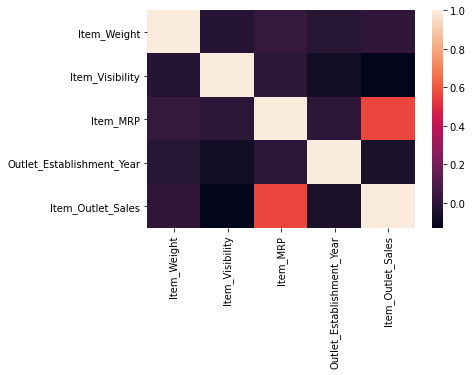

In [102]:
sns.heatmap(corr)

Text(0, 0.5, 'no of sales')

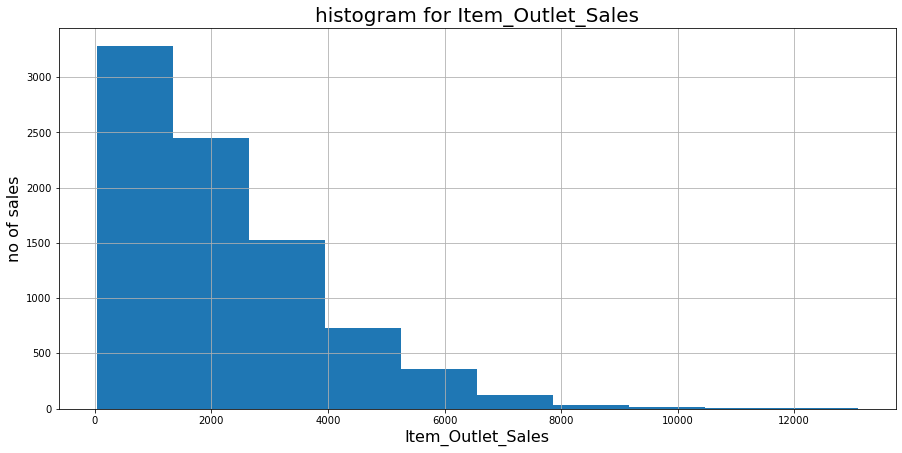

In [103]:
train['Item_Outlet_Sales'].hist(figsize=(15,7))
plt.title("histogram for Item_Outlet_Sales",fontsize=20)
plt.xlabel("Item_Outlet_Sales",fontsize=16)
plt.ylabel("no of sales",fontsize=16)#this is our target variable

In [104]:
#now we can look into categorical variables

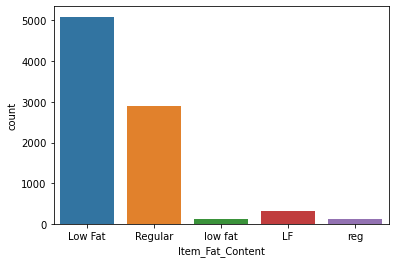

In [105]:
sns.countplot(train.Item_Fat_Content)

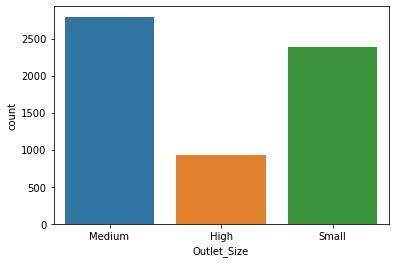

In [106]:
sns.countplot(train.Outlet_Size)

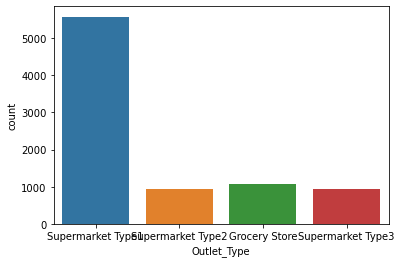

In [107]:
sns.countplot(train.Outlet_Type)

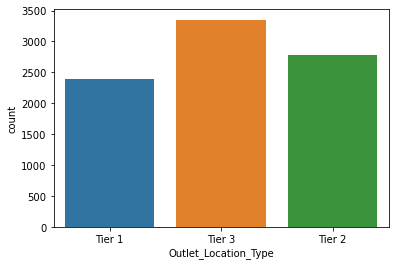

In [108]:
sns.countplot(train.Outlet_Location_Type)

In [109]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

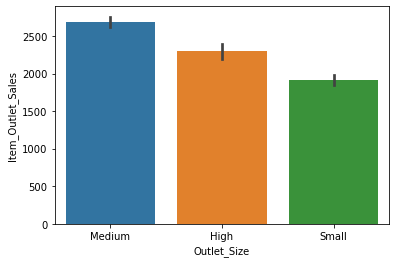

In [110]:
sns.barplot(x=train['Outlet_Size'],y=train['Item_Outlet_Sales'])

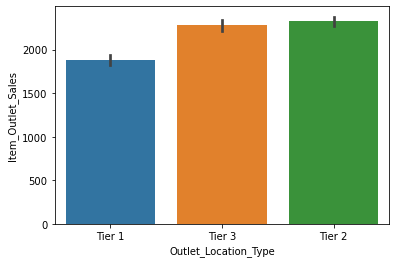

In [111]:
sns.barplot(x=train['Outlet_Location_Type'],y=train['Item_Outlet_Sales'])

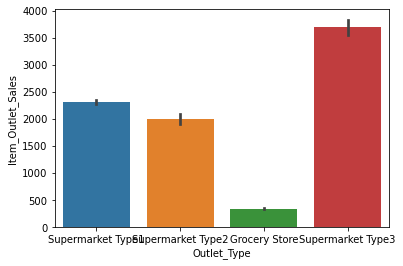

In [112]:
sns.barplot(x=train['Outlet_Type'],y=train['Item_Outlet_Sales'])

# Preprocessing


In [113]:
train.shape

(8523, 12)

In [114]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [115]:
train.isna().sum()/train.shape[0]*100#shows the missing value percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [116]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# missing value imputation


In [117]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])


In [118]:

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())


In [119]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# outlier removal

In [120]:
numcols=['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales']

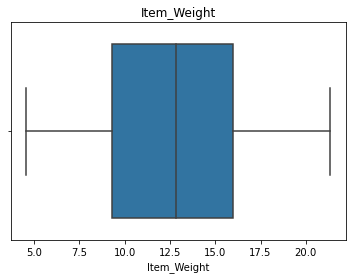

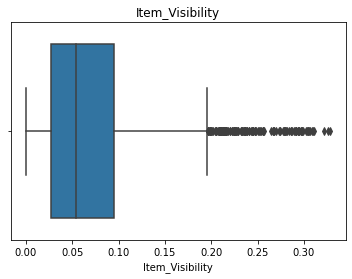

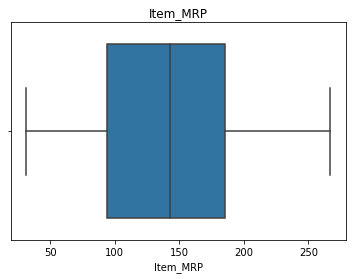

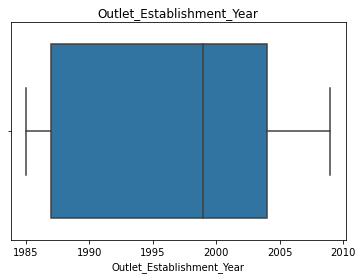

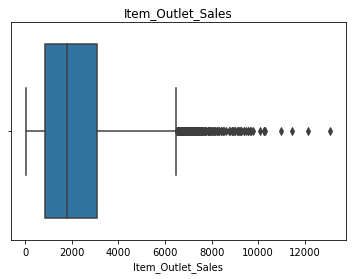

In [121]:
for x in numcols:
    sns.boxplot(train[x],orient='h')#for loop to find out outlier columns
    plt.title(x)
    plt.show()

In [122]:
#item visibility and item outlet sales have outlier values

In [123]:
for x in numcols:
    
    descr = train[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    train[x][train[x]>upper_limit] = upper_limit
    train[x][train[x]<lower_limit] = lower_limit

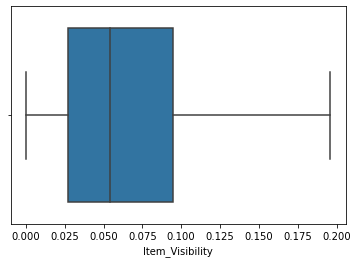

In [124]:
sns.boxplot(train['Item_Visibility'],orient='h')#verification of outlier removal

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
le = LabelEncoder()

In [127]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# label encoding

In [128]:
ordinalcolumn=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type']
#Doing label encoding in ordinal variables

In [129]:
for x in ordinalcolumn:
    train[x] = le.fit_transform(train[x])

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lin_reg = LinearRegression()

In [132]:
X = train.drop(['Item_Outlet_Sales','Item_Identifier'],axis = 1)
X=pd.get_dummies(X)
y = train['Item_Outlet_Sales']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [135]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [136]:
ypred=lin_reg.predict(X_test)

In [137]:
ypred

array([2401.71782682, 2696.94700094, -869.44018873, ...,  600.12377593,
       1720.4485482 ,  713.4751931 ])

In [138]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE for Testing:",MSE)

MSE for Testing: 1143974.3312593324


In [139]:
y_pred_training = lin_reg.predict(X_train)
MSE_training=mean_squared_error(y_pred_training,y_train)
print("MSE for Training:",MSE_training)

MSE for Training: 1105641.65515648


In [140]:
lin_reg.score(X_train,y_train)

0.5800000088151205

In [141]:
lin_reg.score(X_test,y_test)

0.569099342879603

In [142]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((5710, 21), (2813, 21), (5710,), (2813,))

In [143]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1069.567357046452
